# imblearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\Bhakti Gajipara\Downloads\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.drop(columns=["User ID","Gender"],inplace=True)

In [4]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]

In [7]:
from imblearn.under_sampling import RandomUnderSampler      #under sampling convert large data into small(lower) data
from imblearn.over_sampling import RandomOverSampler      #under sampling convert small data into large data

In [8]:
ru = RandomUnderSampler()
ru_x,ru_y = ru.fit_resample(x,y)

In [9]:
ro = RandomOverSampler()
ro_x,ro_y = ro.fit_resample(x,y)

In [10]:
ru_x,ro_x

(     Age  EstimatedSalary
 127   26            32000
 29    31            18000
 263   35            72000
 9     35            65000
 345   41            63000
 ..   ...              ...
 393   60            42000
 395   46            41000
 396   51            23000
 397   50            20000
 399   49            36000
 
 [286 rows x 2 columns],
      Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 509   45            32000
 510   57            60000
 511   49            36000
 512   58            47000
 513   46            88000
 
 [514 rows x 2 columns])

In [11]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [12]:
ro_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(ru_x,ru_y,test_size=0.2)

In [15]:
x1_train,x1_test,y1_train,y1_test = train_test_split(ro_x,ro_y,test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
lr1 = LogisticRegression()
lr1.fit(x1_train,y1_train)

LogisticRegression()

In [19]:
lr.score(x_test,y_test)

0.8275862068965517

In [20]:
lr1.score(x1_test,y1_test)

0.8446601941747572

In [21]:
lr.predict([[49,36000]])

C:\Users\Bhakti Gajipara\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [23]:
cf = confusion_matrix(y_test,lr.predict(x_test))
cf

array([[28,  6],
       [ 4, 20]], dtype=int64)

In [24]:
cf1 = confusion_matrix(y1_test,lr1.predict(x1_test))
cf1

array([[49,  7],
       [ 9, 38]], dtype=int64)

<Axes: >

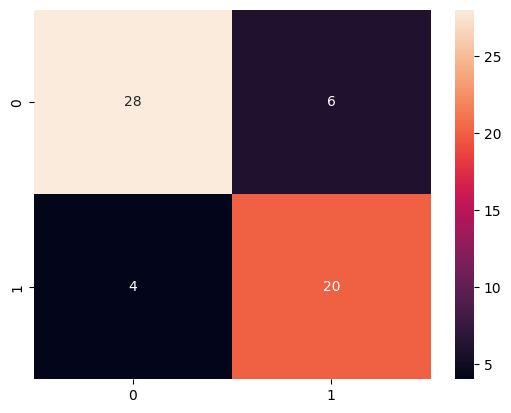

In [25]:
sns.heatmap(cf,annot= True)

<Axes: >

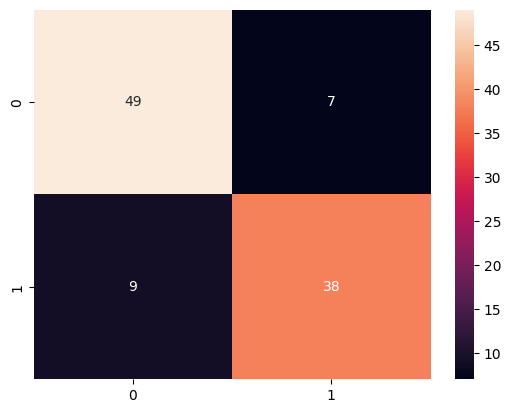

In [26]:
sns.heatmap(cf1,annot= True)

In [27]:
 precision_score(y_test,lr.predict(x_test))

0.7692307692307693

In [28]:
 precision_score(y1_test,lr1.predict(x1_test))

0.8444444444444444

In [29]:
recall_score(y_test,lr.predict(x_test))

0.8333333333333334

In [30]:
recall_score(y1_test,lr1.predict(x1_test))

0.8085106382978723

In [31]:
f1_score(y_test,lr.predict(x_test))

0.8

In [32]:
f1_score(y1_test,lr1.predict(x1_test))

0.8260869565217391